##  Комментарий ревьюера (3)

Сейчас все стало отлично. С моей стороны больше никаких нареканий. Спасибо за доработки и успехов в дальнейшей учебе!

---

## Комментарий ревьюера (2)

Александр, добрый день! Спасибо за переделки, во второй части сейчас все выглядит отлично. Вы задаете верные вопросы, благодаря которым мне  стало проще разобраться, что у Вас было не так. В первой части в формулу нужно добавить умножение на сотню, из за специфики данных. Гляньте сами какие значения в `predicted_valid` и какие в `MAE_df['final.output.recovery']`. Что касается третьей части, Вам нужно построить модель немного по другому, ориентируясь только на признаки которые известны в начале процесса. Я прокомментировал там детальнее.

Мне кажется к следующей итерации Ваша работа уже будет готова к сдаче. Успехов в доделывании.

---

## Комментарий ревьюера


Александр, доброй ночи! Меня зовут Сослан, я делаю ревью Вашей работы. Все мои комментарии добавлены с заголовком, **комментарий ревьюера**.

```diff
- Красным цветом я буду обозначать те места, которые нужно доделать, чтобы я мог принять проект
+ Зеленым выделю то, что сделано отлично
```

Кажется нам еще придется немного поработать над Вашим проектом. Просмотрите пожалуйста мои комментарии, я постарался ответить на Ваш вопрос, почему у Вас получился отрицательный результат. Если у Вас будут еще вопросы, пожалуйста задайте их со следующей итерацией. 

---

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

Возможные значения для блока [тип_параметра]:

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

In [3]:
from sklearn.metrics import mean_absolute_error
import numpy as np

<b>1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [4]:
MAE_df = df_train.dropna()

In [5]:
# Я тут подумал, а ведь умножение на 100 делать не надо, нам ведь не нужны проценты при проссчете MAE. Или все таки нужно?
# А ещё я не понял 'Кроме того, аккуратно проверьте очередность переменных', вроде все было, как в формуле, не считая
# что я подставил не то
def recovery(C, F, T, target_valid):
    
    R = ((C * (F - T)) / (F * (C - T))) * 100 
    predicted_valid = R
    print(mean_absolute_error(target_valid, predicted_valid))
    

recovery(MAE_df['final.output.concentrate_au'], MAE_df['rougher.input.feed_au'], MAE_df['final.output.tail_au'], MAE_df['final.output.recovery'])

8.317935611416911e-15


<b> И такой вопрос, как мне в конкретном случае понять насколько MAE нормальное или нет? Т.е я понимаю, что чем оно ближе к 0 тем лучше, но вот если оно 66 это норм? Это нам говорит о том, что я не умею считать или о том, что в стобце какая-то аномалия?  

## Комментарий ревьюера (2)

```diff
+ Спасибо за отличные вопросы и пояснения, я не совсем верно выразился :) В формуле у Вас все было верно кроме неверно подставленных переменных, про `аккуратно проверить очередность переменных` я имел ввиду последнюю строчку, а не саму функцию. Теперь у Вас все отлично.

- На 100 умножать все же нужно, потому что в  `final.output.recovery` у Вас значения в %. После того, как Вы умножите на 100 у вас ошибка станет пренебрежимо маленькой.
```

---

## Комментарий ревьюера

```diff
- У вас неверно реализована формула recovery. Вернее формула реализована верно, но Вы подаете на вход не те данные. Ее нужно сделать для золота au, а Вы написали ее для серебра ag. Кроме того, аккуратно проверьте очередность переменных. Поэтому у Вас и вышла такая ошибка.
```

Ну и совсем здорово будет, если Вы не будете менять нули, а посчитаете только для корректных значений данных. Добавлю Вам подсказку по переменным, пожалуйста расставьте их чуть внимательнее :):

Для Recovery(final):
* F = rougher.input.feed_au
* C = final.output.concentrate_au
* T = final.output.tail_au

---

<b>1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [6]:
df = [df_train.info(), df_test.info()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

<b>В тестовой выборке нет финальных значений продукта выделенного из руды и количество продукта до флотации, и количество продукта после первичной очистки, так же отсутсвуют хвосты. Самое главное на что мы должны обратить внимание, что отсутсвуют два целевых признака. 

<b>1.4. Проведите предобработку данных.

In [7]:
#Удалим все строки, где пропущены значения целевых признаков

df_train = df_train.dropna(subset = ['final.output.recovery','rougher.output.recovery'])
df_full = df_full.dropna(subset = ['final.output.recovery','rougher.output.recovery'])


In [9]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
#Я просто в процессе менял и забыл комментарий заменить.
#Заменим все оставшиеся пропущенные значения предыдущим 

df_test = df_test.fillna(method = 'ffill')
df_train = df_train.fillna(method = 'ffill')
df_full = df_full.fillna(method = 'ffill') 

## Комментарий ревьюера

Замену переменной делаете верно, только меняете Вы не средним, а предыдущим значением :)

---

Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

Возможные значения для блока [тип_параметра]:

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

# 2. Анализ данных

In [9]:
import seaborn as sns

from math import factorial
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.pyplot as ax

In [10]:
# Создадим три датасета с количеством веществ в продукте на разных стадиях 
df_train_ag = df_train.loc[:, ['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']]
df_train_au = df_train.loc[:, ['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au']]
df_train_pb = df_train.loc[:, ['final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb']]


<b>2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

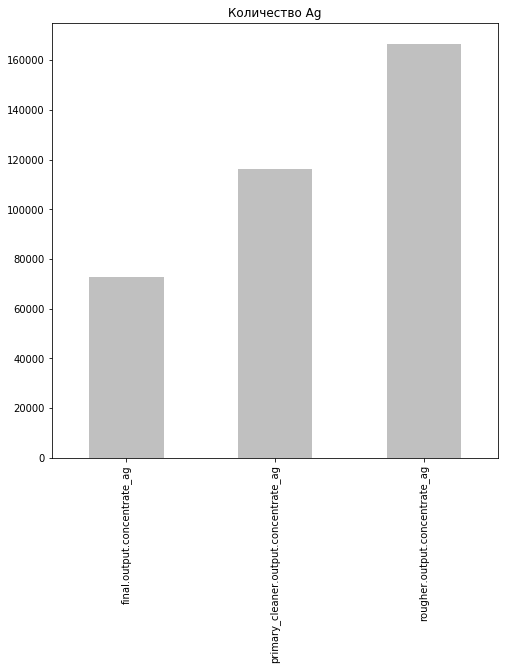

In [11]:
df_train_ag.sum().plot(kind='bar', subplots=True, figsize=(8, 8), color='silver')
plt.title("Количество Ag")
plt.ylabel("")
plt.show()

<b>Видно, что потери серебра к финальному этапу достаточно внушительны 

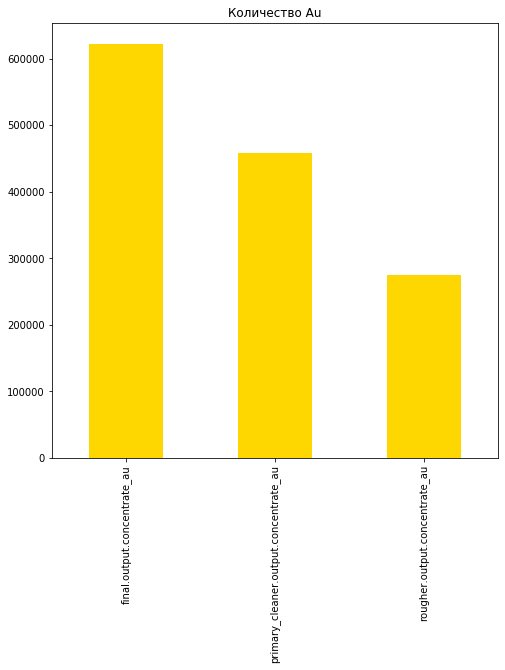

In [12]:
df_train_au.sum().plot(kind='bar', subplots=True, figsize=(8, 8), color='gold')
plt.title("Количество Au")
plt.ylabel("")
plt.show()

<b>Количество золота в продукте наооборот лишь растет с каждым этапом обработки

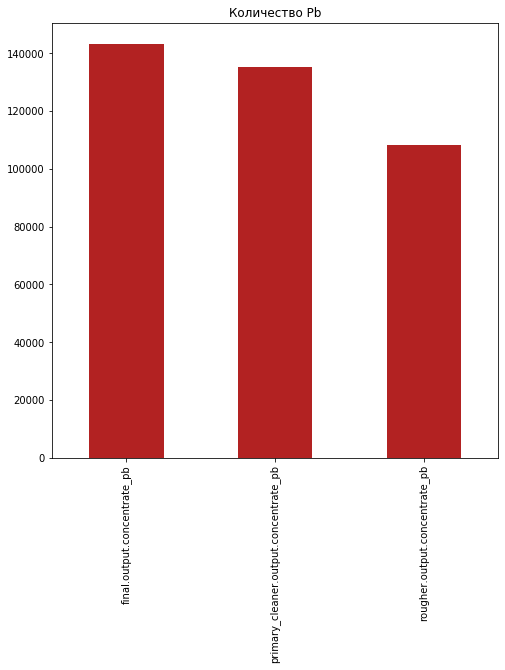

In [13]:
df_train_pb.sum().plot(kind='bar', subplots=True, figsize=(8, 8), color='firebrick')
plt.title("Количество Pb")
plt.ylabel("")
plt.show()

<b>концентрация свинца в продукте так же увеличивается.

<b>2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.



In [14]:
df_train_final_sum = df_train['final.output.tail_ag'] + df_train['final.output.tail_pb'] + df_train['final.output.tail_sol'] + df_train['final.output.tail_au']
df_train_final_sum                        

0        30.354855
1        30.249572
2        29.927500
3        29.986209
4        29.734107
           ...    
16855    23.843587
16856    24.189827
16857    24.152787
16858    23.663112
16859    22.965835
Length: 14149, dtype: float64

In [15]:
df_test['rougher.input.feed_size']

0       62.710452
1       61.961163
2       66.903807
3       59.865919
4       63.315324
          ...    
5851    66.758479
5852    62.560684
5853    73.647513
5854    78.066446
5855    77.678700
Name: rougher.input.feed_size, Length: 5856, dtype: float64

In [16]:
df_test_box = pd.DataFrame(df_test['rougher.input.feed_size'])
df_test_box['train'] = df_train['rougher.input.feed_size']
#df_test_box['2'] = df_train['rougher.input.feed_size']
#[df_test.boxplot('rougher.input.feed_size', figsize=(12, 10)), df_train.boxplot('rougher.input.feed_size', figsize=(12, 10))]
#df_test['rougher.input.feed_size'].describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28aa66f250>,
      dtype=object)

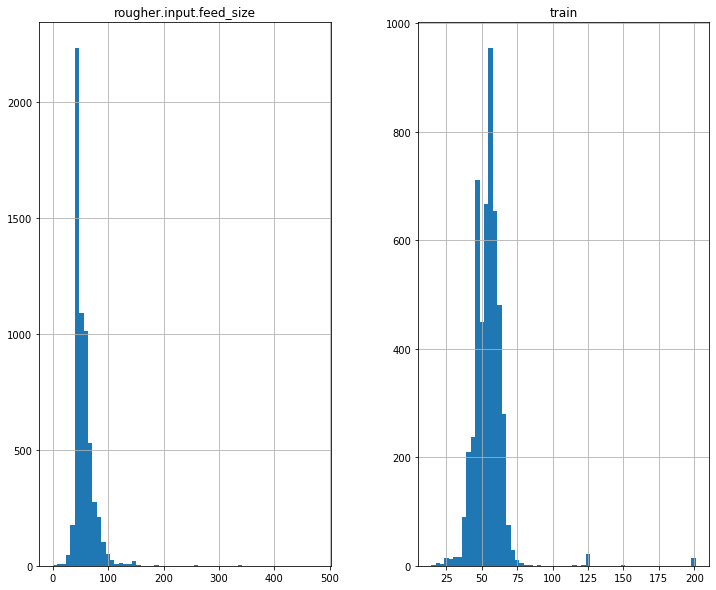

In [17]:
df_test_box.hist(bins = 60, figsize = (12, 10))

<b>Расспределения в двух датасетах паусоновское разве, что в тестовой выборке есть сильный выброс.

<b>2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [18]:
#df_test_sum_rougher = df_test['rougher.input.feed_ag'] + df_test['rougher.input.feed_pb'] + df_test['rougher.input.feed_sol'] + df_test['rougher.input.feed_au'] 

df_train_sum_rougher = df_train.loc[:, ['rougher.output.concentrate_ag', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb']]


df_train_sum_primary_cleaner = df_train.loc[:, ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb']]
df_train_sum_final = df_train.loc[:, ['final.output.concentrate_ag', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.concentrate_pb']]




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28a9995150>,
      dtype=object)

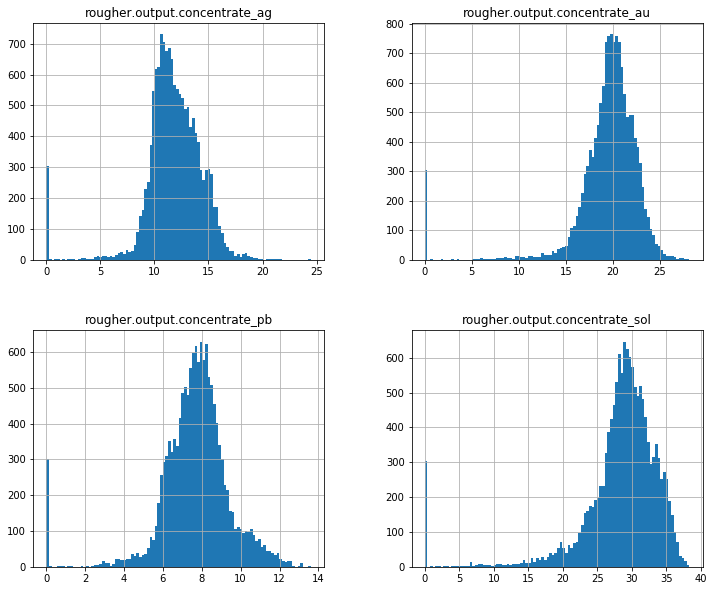

In [19]:
df_train_sum_rougher.hist(figsize=(12, 10), bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28a95ca450>,
      dtype=object)

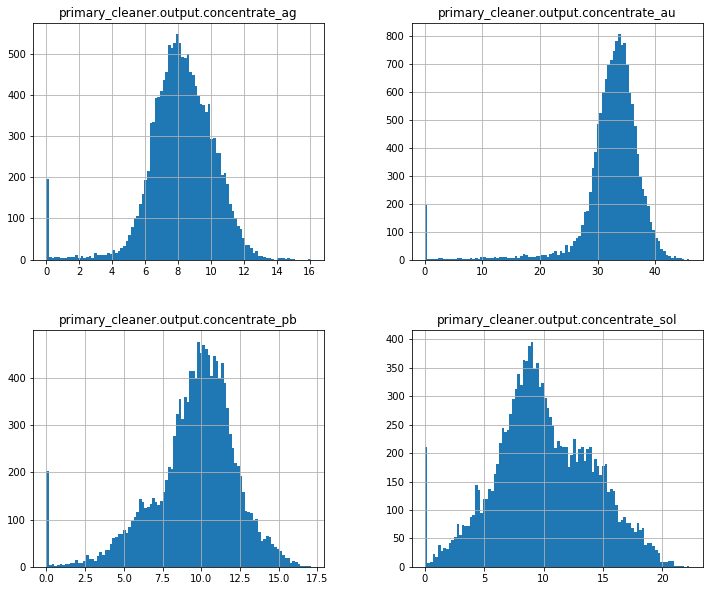

In [20]:
df_train_sum_primary_cleaner.hist(figsize=(12, 10), bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28a93201d0>,
      dtype=object)

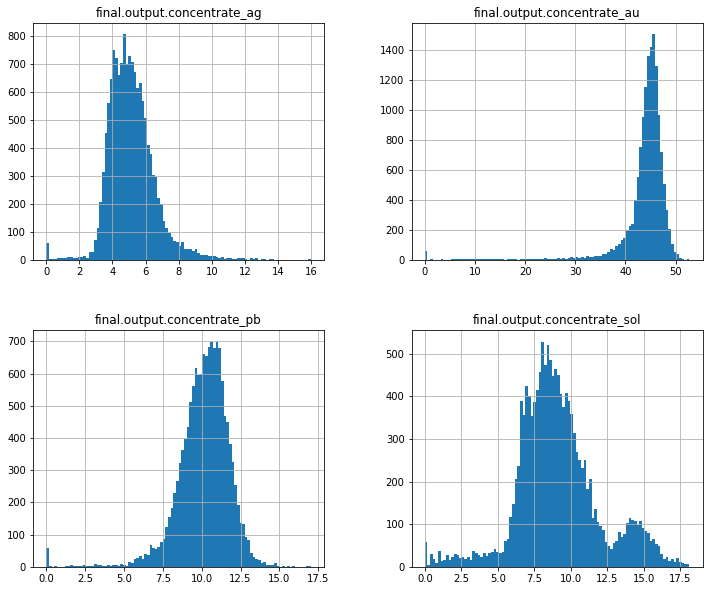

In [21]:
df_train_sum_final.hist(figsize=(12, 10), bins =100)

In [22]:
#Избавимся от аномальных нулей 

df_train = df_train.loc[df_train['rougher.output.concentrate_ag'] != 0]    
df_train = df_train.loc[df_train['rougher.output.concentrate_pb'] != 0] 
df_train = df_train.loc[df_train['rougher.output.concentrate_sol'] != 0] 
df_train = df_train.loc[df_train['rougher.output.concentrate_au'] != 0] 
df_train = df_train.loc[df_train['final.output.concentrate_ag'] != 0] 
df_train = df_train.loc[df_train['final.output.concentrate_pb'] != 0] 
df_train = df_train.loc[df_train['final.output.concentrate_sol'] != 0] 
df_train = df_train.loc[df_train['final.output.concentrate_au'] != 0] 
df_train = df_train.loc[df_train['primary_cleaner.output.concentrate_ag'] != 0] 
df_train = df_train.loc[df_train['primary_cleaner.output.concentrate_pb'] != 0] 
df_train = df_train.loc[df_train['primary_cleaner.output.concentrate_sol'] != 0] 
df_train = df_train.loc[df_train['primary_cleaner.output.concentrate_au'] != 0] 

In [23]:
#Добавим целевые признаки из фул сета в тестовую выборку
df_test['final.output.recovery'] = df_full['final.output.recovery']
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
df_test = df_test.dropna()

## Комментарий ревьюера

Во второй части все сделано верно, но выбор графиков на мой взгляд немного неудачен. Особенно с наложенными друг на друга боксплотами. Я не смог там ничего разглядеть :)

---

## Комментарий ревьюера (2)

```diff
+ Сейчас все просто супер! Спасибо за доработку.
```

---

# 3. Модель

<b>3.1. Напишите функцию для вычисления итоговой sMAPE.

In [24]:
def sMAPE2(target, predictions): 
    return 1/len(predictions) * np.sum(2 * np.abs(target - predictions) / (np.abs(predictions) + np.abs(target))) * 100


<b>3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.metrics import r2_score

In [26]:
#Убираем столбец даты из таблицы

df_ohe_test = df_test.loc[:, 'primary_cleaner.input.sulfate': 'rougher.output.recovery']
df_ohe_train = df_train.loc[:, 'final.output.concentrate_ag': 'secondary_cleaner.state.floatbank6_a_level']

#Проводим дами для более легкого обучения модели. 
df_ohe_test = pd.get_dummies(df_ohe_test, drop_first=True)
df_ohe_train = pd.get_dummies(df_ohe_train, drop_first=True)

In [27]:
#Убираем вторичные признаки из тренировачного датасета
df_ohe_train = df_ohe_train.drop(df_ohe_train.columns[[0, 1, 2, 3, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20,
                               29, 30, 31, 32, 43, 44, 45, 46, 48 , 49, 50, 51, 64, 65, 66, 67]], axis=1)


In [28]:
#Целевые признаки для тестовой выборки
target_test = df_ohe_test.loc[:, ['final.output.recovery', 'rougher.output.recovery']]
features_test = df_ohe_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)


target_test1, target_test2, features_test1, features_test2 = train_test_split(target_test, features_test, test_size=0.05, random_state=12345)

#target_test = target_test.loc[:, ['final.output.recovery', 'rougher.output.recovery']]
#features_test = features_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

In [29]:
#Целевые признаки для обучающий выборки
target = df_ohe_train.loc[:, ['final.output.recovery', 'rougher.output.recovery']]
features = df_ohe_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

In [30]:
#Масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train) 
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
#Функция для рассчета лучшего sMAPE
#Обучаем модель, делаем предсказания, создаем из них датафрейм, делаем кроссвалидацию из двух целевых параметров
#находим финальное sMAPE
def model_best(model, target_train, features_train, targetvalid, featuresvalid, cv):
    model = model
    model.fit(features_train, target_train)
    predict = model.predict(featuresvalid)
    predict = pd.DataFrame(predict)
    smapef = sMAPE2(targetvalid['final.output.recovery'], predict[0])
    smaper = sMAPE2(targetvalid['rougher.output.recovery'], predict[1])
    smape_scorer = make_scorer(sMAPE2, greater_is_better = True)
    cross_val_r = cross_val_score(model, featuresvalid, targetvalid['rougher.output.recovery'], cv=cv, scoring = smape_scorer)
    cross_val_f = cross_val_score(model, featuresvalid, targetvalid['final.output.recovery'], cv=cv, scoring = smape_scorer)
    print('smape_final =', 0.25 * cross_val_r.mean() + 0.75 * cross_val_f.mean())
    
    

In [33]:
model_best(LinearRegression(), target_train, features_train, target_valid, features_valid, 14)

smape_final = 7.276473724668228


In [34]:
model_best(LinearRegression(), target_train, features_train, target_test1, features_test, 14)

smape_final = 10.881068446654705


In [35]:
model_best(DecisionTreeRegressor(random_state=12345, max_depth=20, splitter = 'best'), target_train, features_train, target_test1, features_test1, 6)

smape_final = 10.196635591751003


In [36]:
model_best(RandomForestRegressor(random_state=12345, max_depth=10, n_estimators=10), target_train, features_train, target_test1, features_test1, 10)

smape_final = 8.791905351970968


Самой лучшей и оптимальной моделью является RandomForestRegressor

<b>А теперь у меня вопрос, все это я должен был проверить на тестовой выборке, в чате сказали, что нужно в неё засунуть только целевые признаки из фулсета, но тогда модель не хочет работать с этими данными из-за разности в столбцах. И ещё один вопрос, как мне вообще понять насколько оптимально sMAPE, оно должно стремиться к 0, как MAE? 

## Комментарий ревьюера (2)

И вновь спасибо за отличный вопрос :). Прошлый раз я не стал смотреть детально, потому что немного запутался в Вашем коде. Тут дело в том, что модель Вам нужно строить только на предварительных данных убрав все промежуточные значения. То есть только на тех признаках, которые есть в обоих датасетах. Промежуточные значения Вам нужны были только для проверки верности расчетов и анализа который Вы проводите во второй части проекта. Что касается sMAPE, то да чем меньше оно тем лучше, думаю после того как Вы переделаете проект у Вас на валидации smape составит 4-5, а на тесте 8-10.

```diff
- Перед построением модели, Вам нужно избавиться в тренировочных данных от признаков значения которых были полученны в промышленном процессе, и построить модель только на начальных данных, предсказав промежуточное значение  `rougher.output.recovery` и итоговое `final.output.recovery`. Ну а оценкой у Вас будет взвешенная сумма этих двух значений.
```

----

## Комментарий ревьюера

```diff
- Я хотел бы Вас попросить почистить код от неиспользуемых частей в третьем разделе. И добавить немного больше комментариев к тому, что происходит. Иначе очень сложно делать код ревью. Например, неясно, для чего Вы делаете .get_dummies(), или используется ли где-то функция sMAPE и если да почему у нее закомментирован return :).
```

Отрицательным значение smape у Вас получилось потому что в этой строчке: 

``
    smape_scorer = make_scorer(sMAPE2, greater_is_better = False)
``
вы добавили параметр, а в этом случае scorer добавляет знак минуса к результату `greater_is_better = False`

Вот выдержка из документации:

Whether score_func is a score function (default), meaning high is good, or a loss function, meaning low is good. In the latter case, the scorer object will sign-flip the outcome of the score_func.

---

<b> Спасибо за помощь

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [X]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке